<a href="https://colab.research.google.com/github/JYPIT/DataScience/blob/main/Machine%20Learning/Project/%5BSklearn%5D%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%ED%95%B4%EC%A7%80_%EC%98%88%EC%B8%A1(%ED%95%B4%EC%A7%80_%EA%B3%A0%EA%B0%9D_1%2C_%EA%B8%B0%EC%A1%B4_%EA%B3%A0%EA%B0%9D_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for reading and handling the data
import numpy as np
import pandas as pd

# Libraries for data visualizaion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data visualizaion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for data visualizaion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Libraries for Analysing the ML model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# 객체를 생성하는 것은 대문자로 되어있다

###한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
df = pd.read_csv("/content/BankChurners.csv")
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,1
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,4
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...
4660,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,3
4661,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,2
4662,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3
4663,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Attrition_Flag          4665 non-null   object
 1   Customer_Age            4665 non-null   int64 
 2   Gender                  4665 non-null   object
 3   Dependent_count         4665 non-null   int64 
 4   Education_Level         4665 non-null   object
 5   Marital_Status          4665 non-null   object
 6   Income_Category         4665 non-null   object
 7   Card_Category           4665 non-null   object
 8   Months_Inactive_12_mon  4665 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 328.1+ KB


### Unknown -> NaN으로 변경

In [ ]:
print(df['Attrition_Flag'].unique())
print(df['Gender'].unique())
print(df['Dependent_count'].unique()) # 부양 자식
print(df['Education_Level'].unique())
print(df['Marital_Status'].unique())

# Income_Category
# <$ 40K, $ 40K-60K, $ 60K-$ 80K, $ 80K- $ 120K, $ 120K+
print(df['Income_Category'].unique())

print(df['Card_Category'].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
[3 5 4 2 0 1]
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
df.replace("Unknown",np.NaN,inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,1
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,4
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...
4660,Attrited Customer,55,F,3,Uneducated,Single,NaN,Blue,3
4661,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,2
4662,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3
4663,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Attrition_Flag          4665 non-null   object
 1   Customer_Age            4665 non-null   int64 
 2   Gender                  4665 non-null   object
 3   Dependent_count         4665 non-null   int64 
 4   Education_Level         3969 non-null   object
 5   Marital_Status          4386 non-null   object
 6   Income_Category         4206 non-null   object
 7   Card_Category           4665 non-null   object
 8   Months_Inactive_12_mon  4665 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 328.1+ KB


In [ ]:
rdf = df.dropna(how='any',axis=0)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 0 to 4664
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Attrition_Flag          3364 non-null   object
 1   Customer_Age            3364 non-null   int64 
 2   Gender                  3364 non-null   object
 3   Dependent_count         3364 non-null   int64 
 4   Education_Level         3364 non-null   object
 5   Marital_Status          3364 non-null   object
 6   Income_Category         3364 non-null   object
 7   Card_Category           3364 non-null   object
 8   Months_Inactive_12_mon  3364 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 262.8+ KB


In [ ]:
rdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,1
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,1
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,1
...,...,...,...,...,...,...,...,...,...
4656,Attrited Customer,47,M,4,Graduate,Divorced,$80K - $120K,Blue,3
4657,Attrited Customer,33,M,2,College,Married,$120K +,Gold,1
4658,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,3
4662,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3


In [ ]:
print(rdf['Attrition_Flag'].unique())
print(rdf['Gender'].unique())
print(rdf['Dependent_count'].unique()) # 부양 자식
print(rdf['Education_Level'].unique())
print(rdf['Marital_Status'].unique())

# Income_Category
# <$ 40K, $ 40K-60K, $ 60K-$ 80K, $ 80K- $ 120K, $ 120K+
print(rdf['Income_Category'].unique())

print(rdf['Card_Category'].unique())  # 은행과의 관계 기간
print(rdf['Months_Inactive_12_mon'].unique()) # 지난 12개월 동안 비활성화 상태인 개월 수
#print(df['Avg_Utilization_Ratio'].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
[3 5 2 1 4 0]
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
['Blue' 'Gold' 'Silver' 'Platinum']
[1 2 3 6 0 5 4]


[3 2 5 6 0 4 1]
['Married' 'Single' 'Unknown' 'Divorced']
[1 0]
['Blue' 'Gold' 'Silver' 'Platinum']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']
[3 5 4 2 0 1]
['Blue' 'Gold' 'Silver' 'Platinum']
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# 이탈 고객을 1로 변경
temp = []

for each in rdf['Attrition_Flag']:
  if each == 'Attrited Customer':
    temp.append(1)
  elif each == 'Existing Customer':
    temp.append(0)
  else:
    temp.apppend(np.nan)
    
rdf['Attrition_Flag'] = temp

rdf['Gender'] = le.fit_transform(rdf['Gender'])
print(list(le.classes_))

rdf['Education_Level'] = le.fit_transform(rdf['Education_Level'])
print(list(le.classes_))

rdf['Marital_Status'] = le.fit_transform(rdf['Marital_Status'])
print(list(le.classes_))

rdf['Income_Category'] = le.fit_transform(rdf['Income_Category'])
print(list(le.classes_))

rdf['Card_Category'] = le.fit_transform(rdf['Card_Category'])
print(list(le.classes_))

['F', 'M']
['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated']
['Divorced', 'Married', 'Single']
['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K']
['Blue', 'Gold', 'Platinum', 'Silver']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
rdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,0,45,1,3,3,1,2,0,1
1,0,49,0,5,2,2,4,0,1
2,0,51,1,3,2,1,3,0,1
4,0,40,1,3,5,1,2,0,1
5,0,44,1,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...
4656,1,47,1,4,2,0,3,0,3
4657,1,33,1,2,0,1,0,1,1
4658,1,27,1,0,3,0,2,0,3
4662,1,44,0,1,3,1,4,0,3


In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 0 to 4664
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Attrition_Flag          3364 non-null   int64
 1   Customer_Age            3364 non-null   int64
 2   Gender                  3364 non-null   int64
 3   Dependent_count         3364 non-null   int64
 4   Education_Level         3364 non-null   int64
 5   Marital_Status          3364 non-null   int64
 6   Income_Category         3364 non-null   int64
 7   Card_Category           3364 non-null   int64
 8   Months_Inactive_12_mon  3364 non-null   int64
dtypes: int64(9)
memory usage: 262.8 KB


###현재 고객과 이탈 고객 분포도 확인

In [ ]:
rdf['Attrition_Flag'].value_counts()
frequency = [5968,1113]
frequency

[5968, 1113]

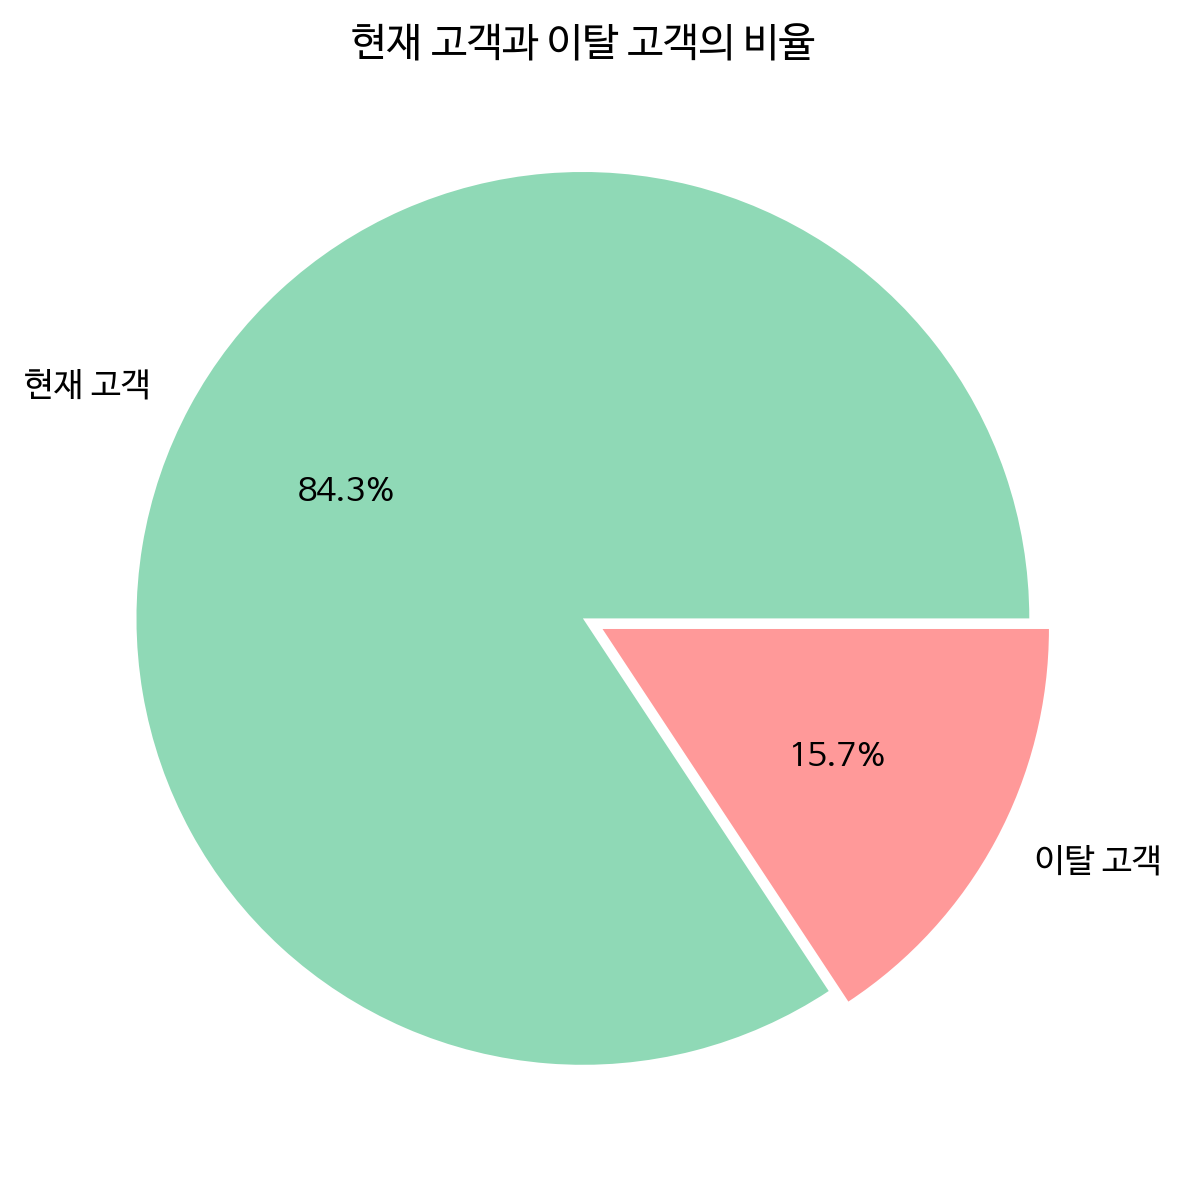

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='NanumBarunGothic')
plt.figure(figsize=(6,6),dpi=120)
label = ['현재 고객','이탈 고객']
color = ['#8fd9b6', '#ff9999']
plt.axis('equal')
plt.pie(x=frequency,labels=label, autopct ='%.1f%%',colors=color,explode=(0,0.05))
plt.title("현재 고객과 이탈 고객의 비율")
plt.show()


In [ ]:
print(rdf['Attrition_Flag'].unique())
print(rdf['Gender'].unique())
print(rdf['Dependent_count'].unique()) # 부양 자식
print(rdf['Education_Level'].unique())
print(rdf['Marital_Status'].unique())

# Income_Category
# <$ 40K, $ 40K-60K, $ 60K-$ 80K, $ 80K- $ 120K, $ 120K+
print(rdf['Income_Category'].unique())

print(rdf['Card_Category'].unique())
print(df['Months_Inactive_12_mon'].unique())
#print(df['Avg_Utilization_Ratio'].unique())

[0 1]
[1 0]
[3 5 2 1 4 0]
[3 2 5 0 4 1]
[1 2 0]
[2 4 3 1 0]
[0 1 3 2]
[1 4 2 3 6 0 5]


['Existing Customer' 'Attrited Customer']<br>
[0 1]<br>
['M' 'F']<br>
[1 0]<br>
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'  'Doctorate']<br>
[3 2 5 0 4 1]<br>
['Married' 'Single' 'Divorced']<br>
[1 2 0]<br>
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']<br>
[2 4 3 1 0]<br>
['Blue' 'Gold' 'Silver' 'Platinum']<br>
[0 1 3 2]<br>
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 0 to 4664
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Attrition_Flag          3364 non-null   int64
 1   Customer_Age            3364 non-null   int64
 2   Gender                  3364 non-null   int64
 3   Dependent_count         3364 non-null   int64
 4   Education_Level         3364 non-null   int64
 5   Marital_Status          3364 non-null   int64
 6   Income_Category         3364 non-null   int64
 7   Card_Category           3364 non-null   int64
 8   Months_Inactive_12_mon  3364 non-null   int64
dtypes: int64(9)
memory usage: 262.8 KB


In [ ]:
'''categorical_var=['Attrition_Flag',
                 'Customer_Age',                 
                 'Gender',
                 'Dependent_count',
                 'Education_Level',                
                 'Marital_Status',
                 'Income_Category',
                 'Card_Category']
rdf[categorical_var]= rdf[categorical_var].astype('category')
rdf.info()'''

"categorical_var=['Attrition_Flag',\n                 'Customer_Age',                 \n                 'Gender',\n                 'Dependent_count',\n                 'Education_Level',                \n                 'Marital_Status',\n                 'Income_Category',\n                 'Card_Category']\nrdf[categorical_var]= rdf[categorical_var].astype('category')\nrdf.info()"

In [ ]:
rdf['Attrition_Flag'].value_counts()

0    2251
1    1113
Name: Attrition_Flag, dtype: int64

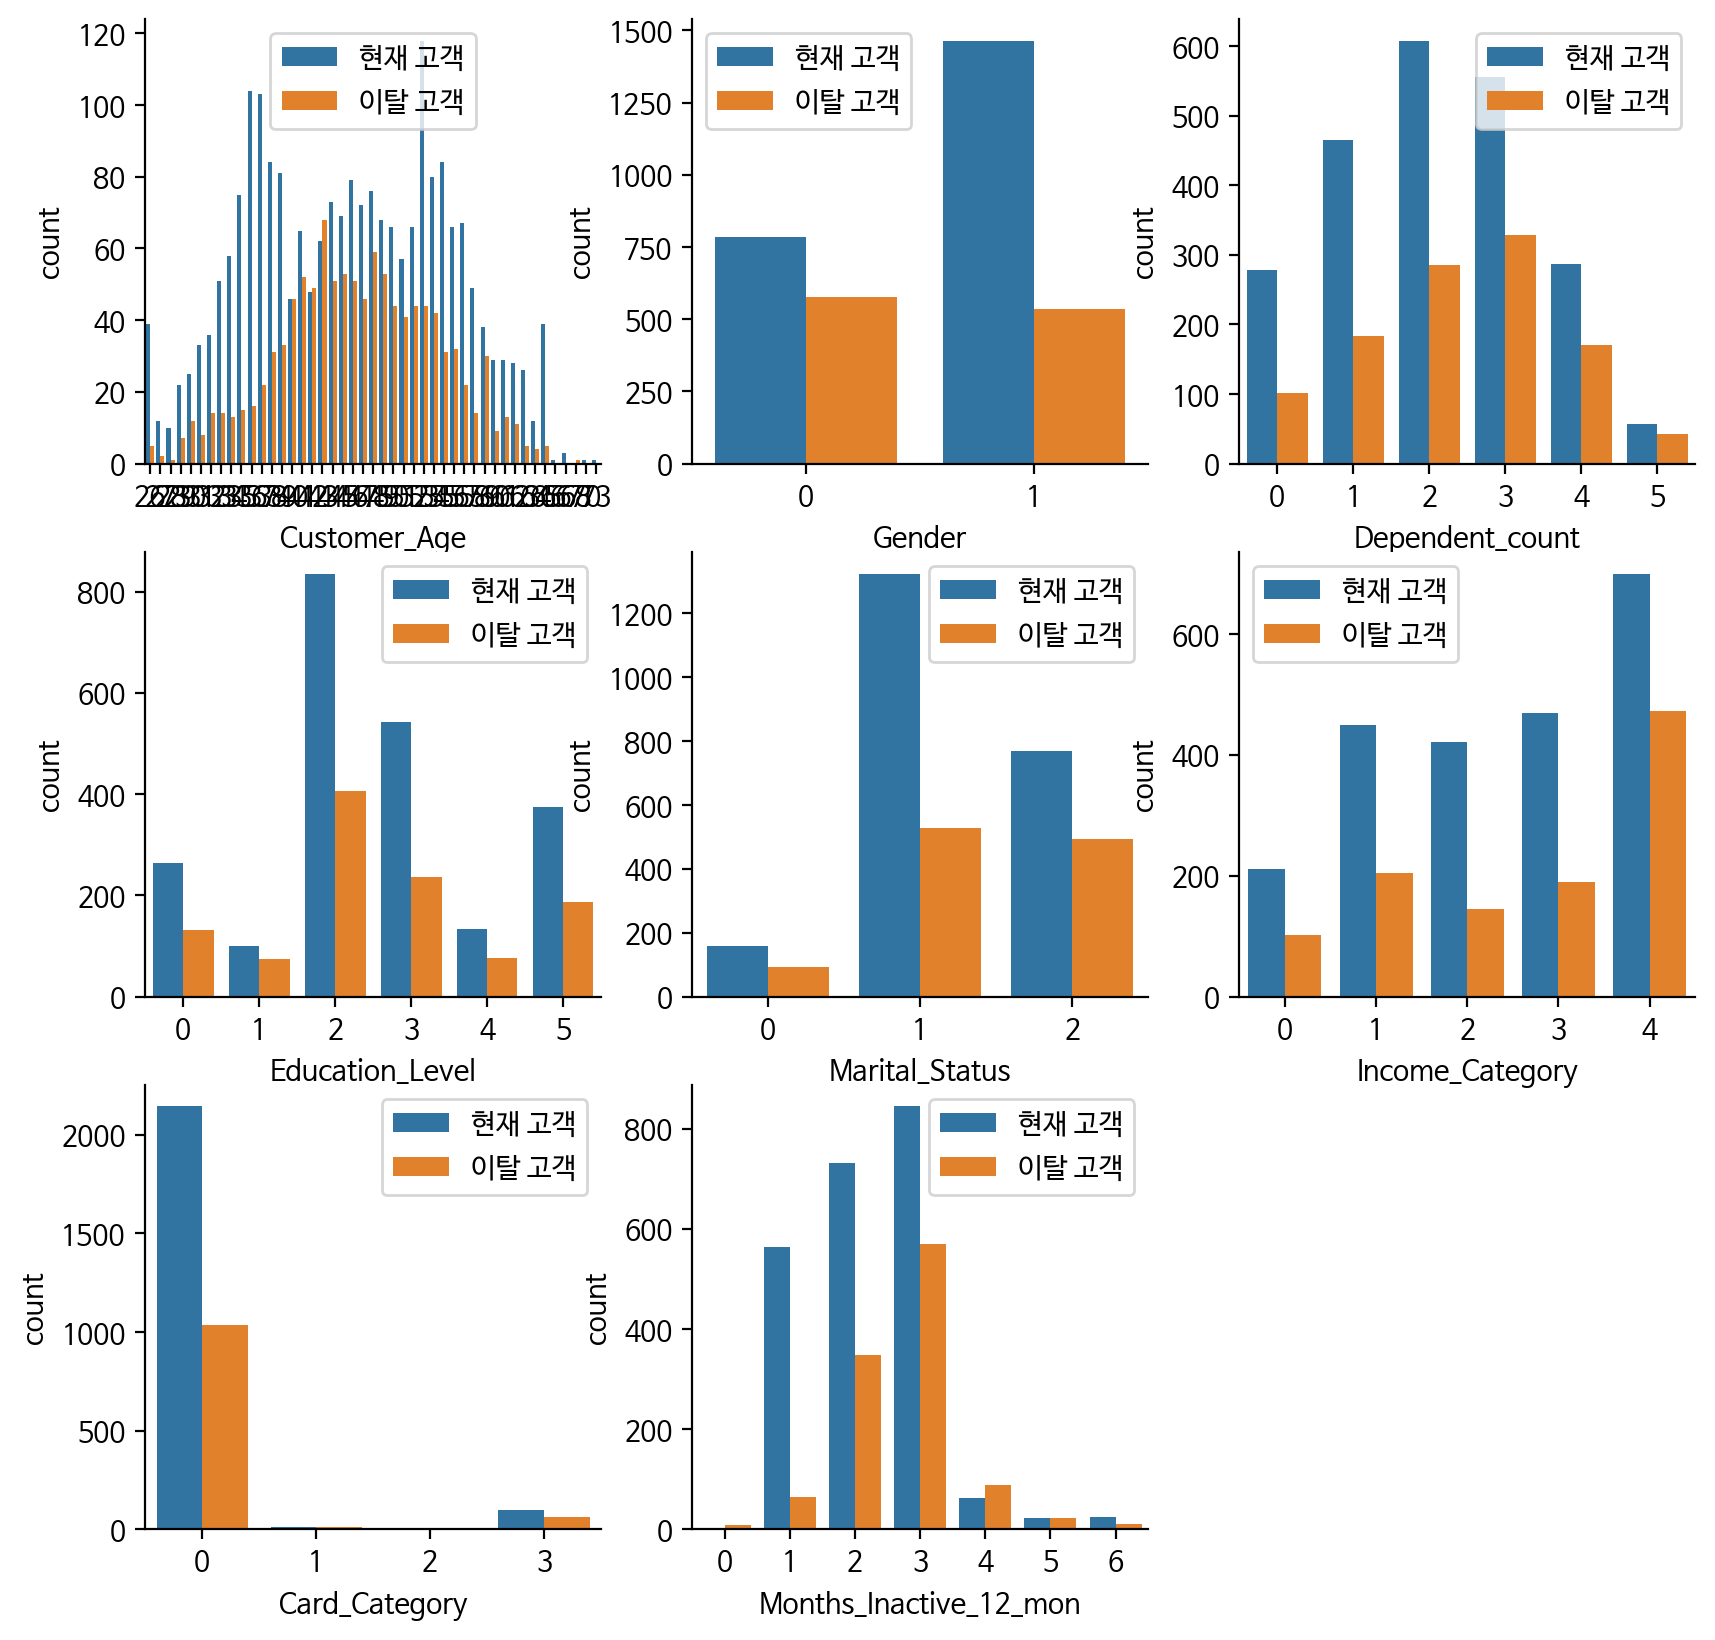

In [ ]:
attributes = ['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Months_Inactive_12_mon']

plt.figure(figsize=(10,10),dpi=100)
for i, feature in enumerate(attributes):
  plt.subplot(3,3,i+1)
  sns.countplot(data=rdf, x=feature, hue='Attrition_Flag')
  plt.legend(labels=['현재 고객','이탈 고객'])

sns.despine()

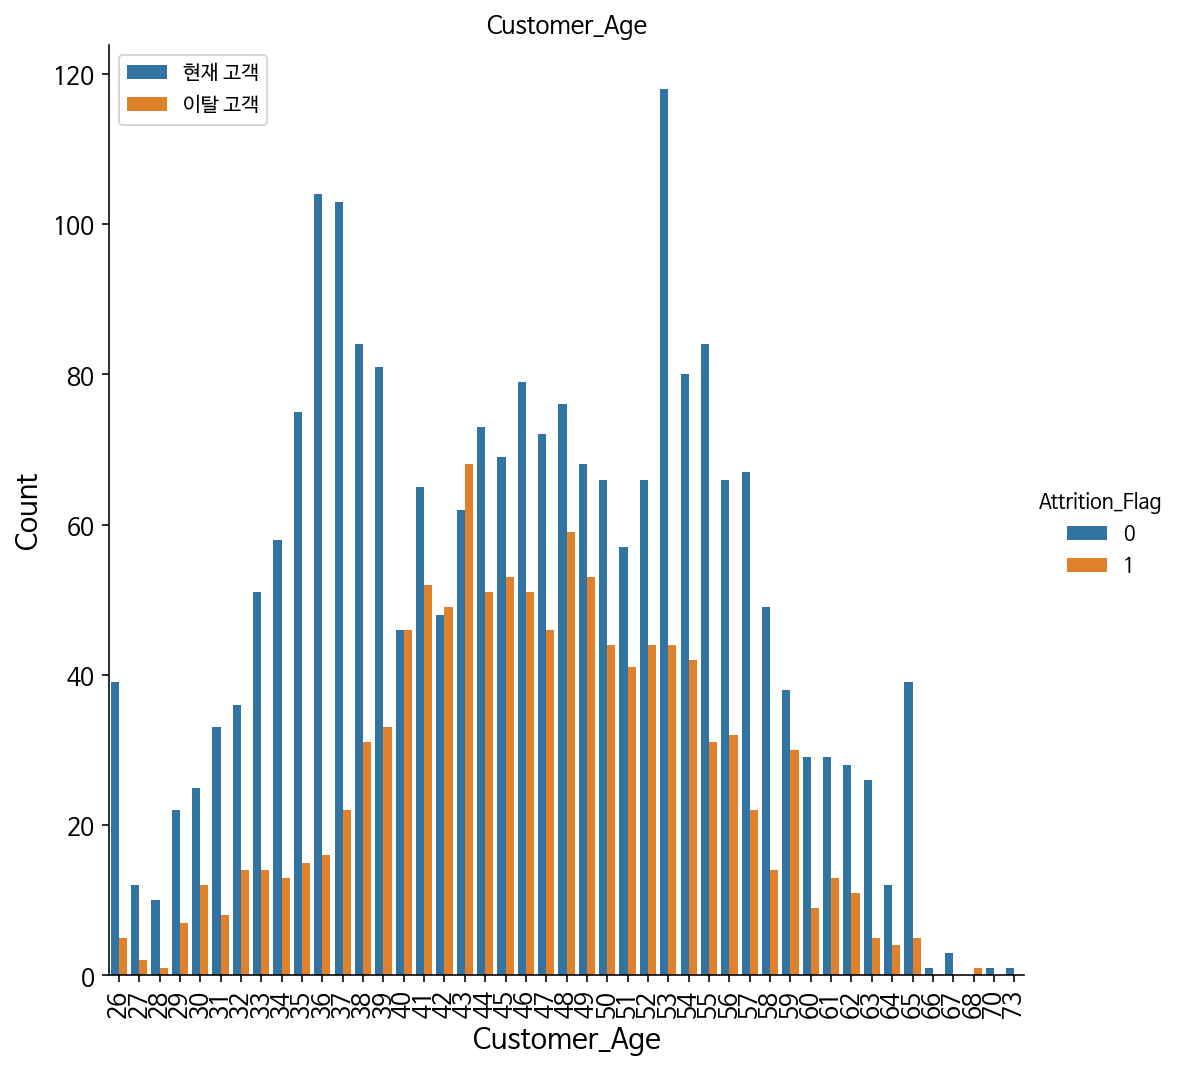

In [ ]:
sns.catplot(x='Customer_Age',kind='count',hue='Attrition_Flag',
            data=rdf, height=7)

plt.tick_params(labelsize=12)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Customer_Age',fontsize=14)
plt.title('Customer_Age')
plt.xticks(rotation=90)
plt.legend(labels=['현재 고객','이탈 고객'])
plt.show()

In [ ]:
rdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,0,45,1,3,3,1,2,0,1
1,0,49,0,5,2,2,4,0,1
2,0,51,1,3,2,1,3,0,1
4,0,40,1,3,5,1,2,0,1
5,0,44,1,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...
4656,1,47,1,4,2,0,3,0,3
4657,1,33,1,2,0,1,0,1,1
4658,1,27,1,0,3,0,2,0,3
4662,1,44,0,1,3,1,4,0,3


In [ ]:
'''column_list = ['CLIENTNUM','Months_on_book','Total_Relationship_Count',	'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit'	,'Total_Revolving_Bal',	'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'	,'Avg_Utilization_Ratio']

for i in column_list:
  rdf.drop([i],axis=1,inplace=True)
rdf'''

"column_list = ['CLIENTNUM','Months_on_book','Total_Relationship_Count',\t'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit'\t,'Total_Revolving_Bal',\t'Avg_Open_To_Buy',\t'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'\t,'Avg_Utilization_Ratio']\n\nfor i in column_list:\n  rdf.drop([i],axis=1,inplace=True)\nrdf"

In [ ]:
rdf.to_csv("forkeras_final.csv")

In [ ]:
rdf

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_Inactive_12_mon
0,0,45,1,3,3,1,2,0,1
1,0,49,0,5,2,2,4,0,1
2,0,51,1,3,2,1,3,0,1
4,0,40,1,3,5,1,2,0,1
5,0,44,1,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...
4656,1,47,1,4,2,0,3,0,3
4657,1,33,1,2,0,1,0,1,1
4658,1,27,1,0,3,0,2,0,3
4662,1,44,0,1,3,1,4,0,3


In [ ]:
'''rdf['Attrition_Flag'] = rdf['Attrition_Flag'].astype('float')
rdf['Customer_Age'] = rdf['Customer_Age'].astype('float')
rdf['Gender'] = rdf['Gender'].astype('category')
rdf['Dependent_count'] = rdf['Dependent_count'].astype('float')
rdf['Education_Level'] = rdf['Education_Level'].astype('float')
rdf['Marital_Status'] = rdf['Marital_Status'].astype('float')
rdf['Income_Category'] = rdf['Income_Category'].astype('float')
rdf['Card_Category'] = rdf['Card_Category'].astype('float')'''

"rdf['Attrition_Flag'] = rdf['Attrition_Flag'].astype('float')\nrdf['Customer_Age'] = rdf['Customer_Age'].astype('float')\nrdf['Gender'] = rdf['Gender'].astype('category')\nrdf['Dependent_count'] = rdf['Dependent_count'].astype('float')\nrdf['Education_Level'] = rdf['Education_Level'].astype('float')\nrdf['Marital_Status'] = rdf['Marital_Status'].astype('float')\nrdf['Income_Category'] = rdf['Income_Category'].astype('float')\nrdf['Card_Category'] = rdf['Card_Category'].astype('float')"

In [ ]:
#dataset = pd.read_csv("/content/forkeras_fix.csv")

In [ ]:
#dataset = dataset.dropna(how='any',axis=0)

In [ ]:
rdf_labels = rdf['Attrition_Flag'].copy()
rdf.drop(['Attrition_Flag'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rdf_labels

0       0
1       0
2       0
4       0
5       0
       ..
4656    1
4657    1
4658    1
4662    1
4664    1
Name: Attrition_Flag, Length: 3364, dtype: int64

In [ ]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 0 to 4664
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Customer_Age            3364 non-null   int64
 1   Gender                  3364 non-null   int64
 2   Dependent_count         3364 non-null   int64
 3   Education_Level         3364 non-null   int64
 4   Marital_Status          3364 non-null   int64
 5   Income_Category         3364 non-null   int64
 6   Card_Category           3364 non-null   int64
 7   Months_Inactive_12_mon  3364 non-null   int64
dtypes: int64(8)
memory usage: 396.5 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rdf,
                                                    rdf_labels,
                                                    train_size=0.70,
                                                    random_state=77)

###머신러닝 모델 구축-1) LogislticRegression

In [ ]:
log_reg = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# 정확도 확인
print("Train data Score: ",log_reg.score(X_train,y_train))
print("Test data Score: ",log_reg.score(X_test,y_test))

Train data Score:  0.6805437553101105
Test data Score:  0.7227722772277227


2) DecisionTree

In [ ]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print("Train data Score: ",log_reg.score(X_train,y_train))
print("Test data Score: ",log_reg.score(X_test,y_test))

Train data Score:  0.6805437553101105
Test data Score:  0.7227722772277227


3) GradientBoostingClassifier

In [ ]:
boost = GradientBoostingClassifier(max_depth=3, learning_rate=0.05).fit(X_train, y_train)

In [ ]:
print("Train data Score: ",boost.score(X_train,y_train))
print("Test data Score: ",boost.score(X_test,y_test))

Train data Score:  0.7412914188615123
Test data Score:  0.7435643564356436


4) RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=300,
                                random_state=0).fit(X_train, y_train)

In [ ]:
print("Train data Score: ",random.score(X_train,y_train))
print("Test data Score: ",random.score(X_test,y_test))

Train data Score:  0.9791843670348344
Test data Score:  0.7079207920792079


###성능평가 - ROC 커브

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

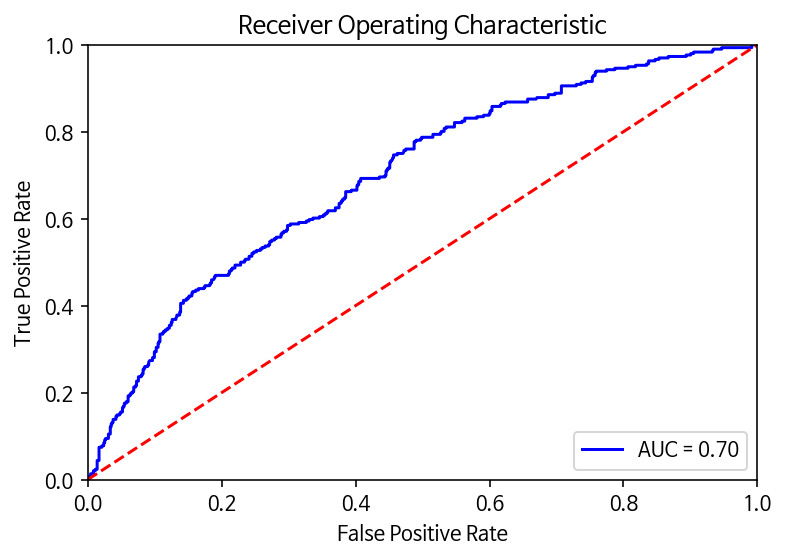

In [ ]:
# Logistic Regression ROC
plot_auc_roc(log_reg)

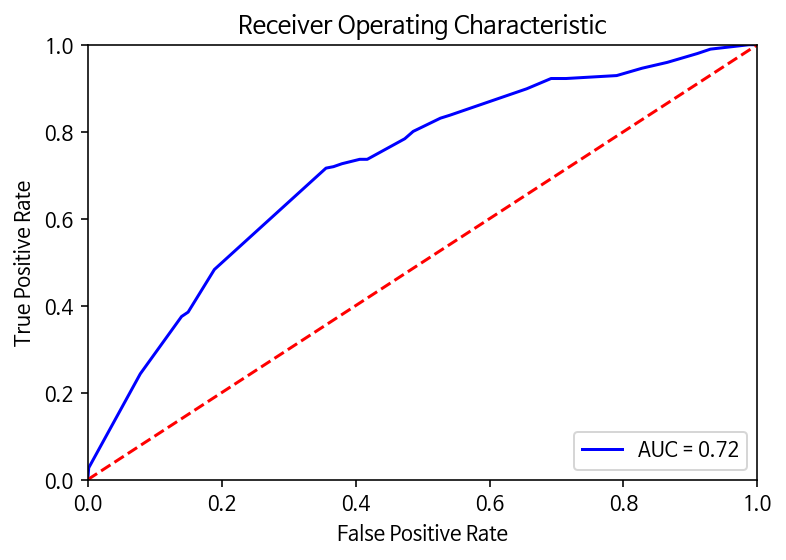

In [ ]:
# Decision Tree
plot_auc_roc(tree)

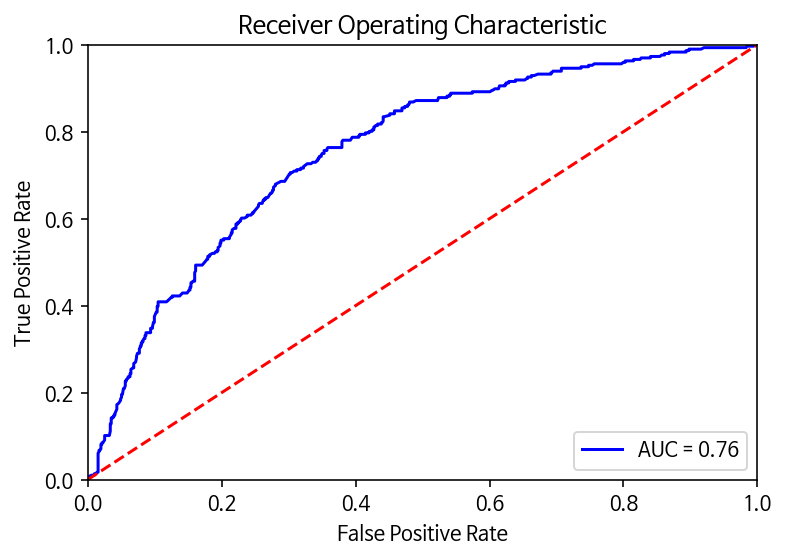

In [ ]:
# GradientBoostingClassifier
plot_auc_roc(boost)

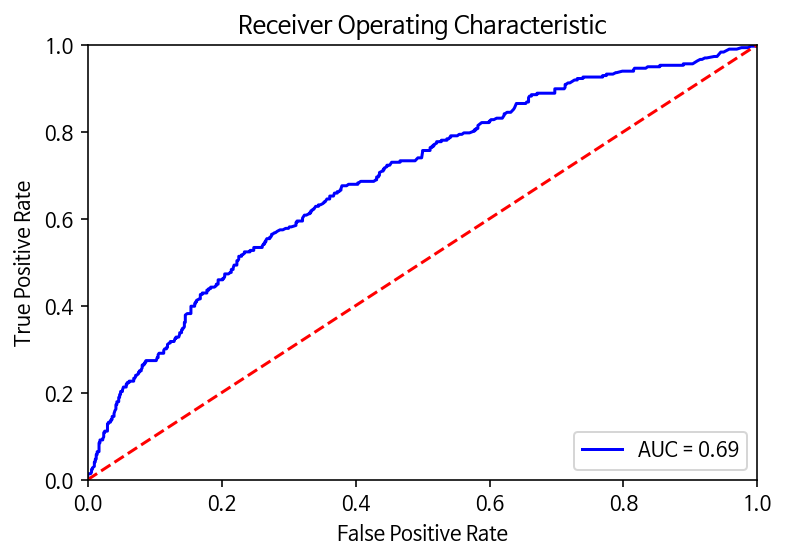

In [ ]:
# RandomForestClassifier
plot_auc_roc(random)

###모델 성능 평가

In [ ]:
# Logistic Regression Report
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test,lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)

print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       714
           1       0.56      0.25      0.35       296

    accuracy                           0.72      1010
   macro avg       0.65      0.59      0.59      1010
weighted avg       0.69      0.72      0.68      1010

accuracy 0.7227722772277227
precision 0.5597014925373134
recall 0.2533783783783784
f1 0.3488372093023256


In [ ]:
# Decision tree Report
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test,tree_y_hat)
print('Decision tree 평가 지표')
print(tree_report)

print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )

Decision tree 평가 지표
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       714
           1       0.53      0.38      0.44       296

    accuracy                           0.72      1010
   macro avg       0.65      0.62      0.62      1010
weighted avg       0.70      0.72      0.70      1010

accuracy 0.7178217821782178
precision 0.5260663507109005
recall 0.375
f1 0.4378698224852071


In [ ]:
# GradientBoostingClassifier Report
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test,boost_y_hat)
print('GradientBoosting 평가 지표')
print(boost_report)

print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )

GradientBoosting 평가 지표
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       714
           1       0.60      0.36      0.45       296

    accuracy                           0.74      1010
   macro avg       0.69      0.63      0.64      1010
weighted avg       0.72      0.74      0.72      1010

accuracy 0.7435643564356436
precision 0.6033519553072626
recall 0.36486486486486486
f1 0.4547368421052631


In [ ]:
# RandomForestClassifier Report
random_y_hat = random.predict(X_test)
random_report = metrics.classification_report(y_test,random_y_hat)
print('RandomForest 평가 지표')
print(lg_report)

print('accuracy', metrics.accuracy_score(y_test,random_y_hat) )
print('precision', metrics.precision_score(y_test,random_y_hat) )
print('recall', metrics.recall_score(y_test,random_y_hat) )
print('f1', metrics.f1_score(y_test,random_y_hat) )

RandomForest 평가 지표
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       714
           1       0.56      0.25      0.35       296

    accuracy                           0.72      1010
   macro avg       0.65      0.59      0.59      1010
weighted avg       0.69      0.72      0.68      1010

accuracy 0.7079207920792079
precision 0.5019607843137255
recall 0.43243243243243246
f1 0.4646098003629764


In [ ]:
precision_list = []
recall_list = []

precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

precision_list.append(metrics.precision_score(y_test,tree_y_hat))
recall_list.append(metrics.recall_score(y_test,tree_y_hat))

precision_list.append(metrics.precision_score(y_test,boost_y_hat))
recall_list.append(metrics.recall_score(y_test,boost_y_hat))

precision_list.append(metrics.precision_score(y_test,random_y_hat))
recall_list.append(metrics.recall_score(y_test,random_y_hat))

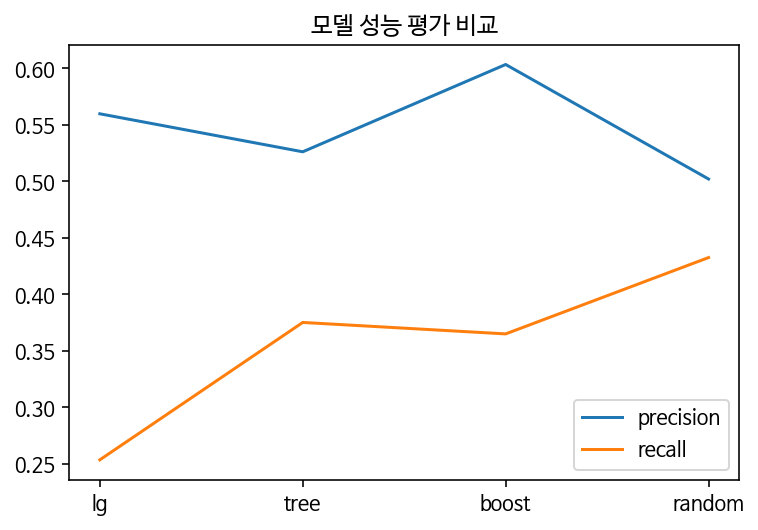

In [ ]:
plt.plot(['lg','tree','boost','random'],precision_list, label='precision')
plt.plot(['lg','tree','boost','random'],recall_list, label='recall')
plt.title("모델 성능 평가 비교")
plt.legend()
plt.show()